In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
# Read the csv file into a pandas DataFrame
# df = pd.read_csv('projects/nba-attendance/Data/Attendance.csv')
df = pd.read_csv('../Data/Attendance.csv')
df.head()

,NBA Season,Team,% Salary Cap,Prev # All-Stars,Prev W-L,# (H) Games,(H) Attendance Season,(H) Arena Capacity,(H) Capacity Season,(H) Avg Attendance,(H) % Capacity,# (A) Games,(A) Avg Attendance,(A) % Capacity,(A) Games,(H) & (A) Avg,(H) & (A) PCT
0,2008-2009,Atlanta Hawks,1.16,1,0.45,41,686688,18118,742838,16748,0.89,41,17303,0.90,82,17026,0.90
1,2009-2010,Atlanta Hawks,1.05,2,0.57,41,678375,18118,742838,16546,0.88,41,17097,0.89,82,16821,0.88
2,2010-2011,Atlanta Hawks,1.17,2,0.65,41,641596,18118,742838,15649,0.84,41,16957,0.88,82,16303,0.86
3,2011-2012,Atlanta Hawks,1.23,1,0.54,33,501593,18118,597894,15200,0.81,33,16820,0.87,66,16010,0.84
4,2012-2013,Atlanta Hawks,1.13,0,0.61,41,620146,18118,742838,15126,0.81,41,17165,0.89,82,16145,0.85


In [12]:
# Assign the data to  X and y
X = df[["Prev W-L", "Prev # All-Stars"]]
y = df["(H) % Capacity"].values.reshape(-1, 1)
print(X.shape, y.shape)

(270, 2) (270, 1)


In [13]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
# Create a StandardScaler model and fit it to the training data

from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [15]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [16]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

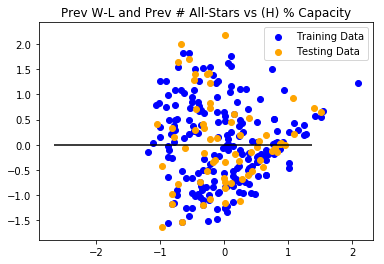

In [18]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Prev W-L and Prev # All-Stars vs (H) % Capacity")
fig = plt.savefig('W-L_AllStars.jpeg')
plt.show()


In [9]:
# Use X_test_scaled, y_test_scaled and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6920145041797193, R2: 0.3320008984985824
